In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession


In [5]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = "--master local[2] pyspark-shell"
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-oracle'
os.environ['PYSPARK_PYTHON'] = '/usr/bin/python3.5'
os.environ['PYSPARK_DRIVER_PYTHON'] = 'usr/bin/python3.5'

In [4]:
spark= SparkSession.builder.appName("Basics").getOrCreate()

In [6]:
os.getcwd()


'/home/dineshb'

If SparkSession.builder.appName("Basics").getOrCreate() or SparkSession.Context() throws an error you need to set two environment variables using

import os
os.environ['PYSPARK_SUBMIT_ARGS'] = "--master local[2] pyspark-shell"
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-oracle'

if problem still persists check if you have java installed or not, install java-8-oracle and then set path

In [7]:
df =spark.read.json('/home/dineshb/Downloads/gig/gig201809012055.json')

In [ ]:
df.show()

In [ ]:
df.printSchema()

In [ ]:
df.columns

In [ ]:
df.describe().show()

In [ ]:
from pyspark.sql.types import StructField,StringType,IntegerType,StructType

In [ ]:
data_schema= [StructField('age',IntegerType(),True),
             StructField('name',StringType(),True)]

In [ ]:
final_struc = StructType(fields=data_schema)

In [ ]:
df= spark.read.json('/home/dineshb/Downloads/gig/gig201809012055.json',schema=final_struc)

In [ ]:
df.printSchema()

In [ ]:
df.show()

In [ ]:
df.select('7UOK884').show()

In [ ]:
df.head(1)

In [ ]:
df.count()

In [ ]:
df.createOrReplaceTempView('people')

In [ ]:
results=spark.sql("select * from people")

In [ ]:
results.show()

In [ ]:
results=spark.sql("select distinct * from people")

In [ ]:
results

In [ ]:
df1=spark.read.csv("appl_stock.csv",inferSchema=True,header=True)

In [ ]:
df1.printSchema()

In [ ]:
df1.show()

In [ ]:
df1.head(3)[0]

In [ ]:
df1.filter("Close<500").select(['Open']).show()

In [ ]:
df1.filter(df1['Close']<500).select('Volume').show()

In [ ]:
df1.filter((df1['Close'] < 200) & (df1['Open'] >200)).select(['Open','Close']).show()

In [ ]:
result= df.filter(df['Low'] == 197.16).collect()
result

In [ ]:
result[0].asDict()

In [ ]:
df=spark.read.json("people.json")

In [ ]:
df.show()

In [ ]:
df.printSchema()

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
df.describe().show()

In [ ]:
from pyspark.sql.types import (StructField,StringType,
                               IntegerType,StructType)

In [ ]:
data_schema = [StructField('age',IntegerType(),True),
               StructField('name',StringType(),True)]

In [ ]:
final_struc= StructType(fields=data_schema)

In [ ]:
df=spark.read.json('people.json',schema=final_struc)

In [ ]:
df.printSchema()

In [ ]:
df['age']

In [ ]:
type(df['age'])

In [ ]:
df.select('age').show()

In [ ]:
type(df.select('age'))

In [ ]:
df.head(2)

In [ ]:
df.head(2)[0]

In [ ]:
df.select(['age','name'])

In [ ]:
df.select(['age','name']).show()

In [ ]:
df.withColumn('newage',df['age']*2).show()

In [ ]:
df.show()

In [ ]:
df.withColumnRenamed('age','newage').show()

In [ ]:
df.createOrReplaceTempView('people')

In [ ]:
results=spark.sql("SELECT * FROM people where age=30")

In [ ]:
results.show()

In [ ]:
df =spark.read.csv('appl_stock.csv',inferSchema=True,header=True)

In [ ]:
df.printSchema()

In [ ]:
df.describe().show()

In [ ]:
df.head(3)[0]

In [ ]:
df.filter("Close<500").show()

In [ ]:
df.filter("Close<500").select(['Open','Close']).show()

In [ ]:
df.filter((df['Close']<200) & (df['Open']>200)).show()

In [ ]:
df.filter((df['Close']<200) & (df['Open']>200)).collect()

In [ ]:
df_sales_info=spark.read.csv('sales_info.csv',inferSchema=True,header=True)

In [ ]:
df_sales_info.show()

In [ ]:
df_sales_info.groupBy('Company').sum().show()

In [ ]:
df_sales_info.agg({'Sales':'sum'}).show()

In [ ]:
df_sales_info.agg({'Sales':'max'}).show()

In [ ]:
df_sales_info.groupBy('Company').agg({'Sales':'max'}).show()

In [ ]:
from pyspark.sql.functions import countDistinct,avg,stddev,format_number

In [ ]:
df_sales_info.select(countDistinct('Sales')).show()

In [ ]:
df_sales_info.select(countDistinct('Sales').alias('New_sales')).show()

In [ ]:
sales_std=df_sales_info.select(stddev("Sales").alias('std'))

In [ ]:
sales_std.show()

In [ ]:
sales_std.select(format_number('std',2).alias('std')).show()

In [ ]:
df_sales_info.orderBy('Sales').show()

In [ ]:
df_sales_info.orderBy(df_sales_info['Sales'].desc()).show()

In [ ]:
df_sales_info.orderBy(df_sales_info['Sales'].desc()).orderBy('Company').show()

In [ ]:
df_with_null=spark.read.csv('ContainsNull.csv',header=True,inferSchema=True)

In [ ]:
df_with_null.show()

In [ ]:
df_with_null.fillna(0).show()

In [ ]:
df_with_null.na.drop().show()

In [ ]:
df_with_null.na.drop(thresh=2).show()

In [ ]:
df_with_null.na.drop(how='any').show()

In [ ]:
df_with_null.na.drop(how='all').show()

In [ ]:
df_with_null.na.drop(subset=['Sales']).show()

In [ ]:
df_with_null.dropna(how='any').show()

In [ ]:
df_with_null.fillna(df_with_null.select(mean('Sales')))

In [5]:
import requests
import json

url_login = "http://68.183.123.253:8880/auth/login"

body_login = {
    'email':'ho2020@yopmail.com',
    'password':'Jaargit@2020'
    }

headers_login = {
    'content-type': "application/json",
    'cache-control': "no-cache"
    }

response_login = requests.request("POST", url_login , data=json.dumps(body_login), headers=headers_login)
print(json.loads(response_login.text)['message'])

data_list=[]
i=1
while i!= None:
    url_data = "http://68.183.123.253:8881/tickets/"

    querystring = {"page":i}

    headers_data = {
        'authorization': json.loads(response_login.text)['Authorization'],
        'cache-control': "no-cache",
        'postman-token': "04280118-5a58-2b5e-89a4-72b59c330ab0"
        }
    
    response_data = requests.request("GET", url_data, headers=headers_data, params=querystring)
    
    if json.loads(response_data.text)['next']==None:
        i=None
    else:
        data_list.append(json.loads(response_data.text)['results'])
        i = i+1

data_list

Successfully logged in.


[[{'assigned_to': 43,
   'category': 'Unused',
   'comments': None,
   'completed_ts': None,
   'created': '2019-06-10T09:33:19.773476Z',
   'description': 'Inspection',
   'display_name': {'admin': False,
    'business_name': 'Test Business',
    'contact_number': '+1787778-7782',
    'dob': None,
    'email': 'alisha2020@yopmail.com',
    'emp_id': None,
    'first_name': 'Alisha',
    'fleet': {'value': ['BMW',
      'Jaguar',
      'Benz',
      'Audi',
      'Bugati',
      'Toyota',
      'Buggati',
      'Honda',
      'Ford-Sydney',
      'sweden',
      'test']},
    'id': 43,
    'image1': None,
    'is_active': True,
    'is_staff': False,
    'last_name': 'Ray',
    'location': None,
    'otp_secret': None,
    'parent_id': 1,
    'parent_type': 'Client',
    'public_id': 'daa999f2-338a-48db-a0ae-ae7e544b86ff',
    'rating': 3,
    'role': 'Vendor',
    'skillset': {'value': ['Group-12',
      'Group-13',
      'Group-5',
      'Group-14',
      'Group-7',
      'Group-6',


In [6]:
sc = spark.sparkContext
df = sc.parallelize(data_list).map(lambda x: json.dumps(x))
df = spark.read.json(df)

In [10]:
df1 = df.toPandas()

In [17]:
import pandas as pd
import numpy as np
df1.fillna(value=np.nan)

,assigned_to,category,comments,completed_ts,created,description,display_name,due_date,end_time,id,...,service,source,source_reference_id,start_time,status,status_detail,title,veh_current_location,veh_location_description,vehicle
0,43,Unused,NaN,NaN,2019-06-10T09:33:19.773476Z,Inspection,"(False, Test Business, +1787778-7782, None, al...",2019-06-10,NaN,388,...,"[(None, None, {}, 701, None, Inspection, 2, No...",NaN,NaN,NaN,0,Not Started,Inspection,"([59.3293, 18.0686], Point)",NaN,"(81, GURG-001)"
1,54,Unused,NaN,NaN,2019-06-10T07:08:05.472683Z,Inspection,"(False, Vendor Test, +177777777771, None, dian...",2019-06-10,NaN,387,...,"[(None, None, {}, 700, None, Inspection, 2, No...",NaN,NaN,NaN,0,Not Started,Inspection,"([59.3293, 18.0686], Point)",NaN,"(94, CH05 V 3445)"
2,47,Unused,NaN,NaN,2019-05-28T09:19:49.136629Z,lost and fopund,"(False, Kia Mechanics and Services, +918894938...",2019-05-29,NaN,386,...,"[(None, None, {}, 699, None, Lost & Found, 3, ...",NaN,NaN,NaN,5,Cancel,te4st,"([59.10157239730797, 18.73876601562506], Point)",NaN,"(79, STK1006)"
3,47,Unused,NaN,NaN,2019-05-28T09:19:49.136457Z,test,"(False, Kia Mechanics and Services, +918894938...",2019-05-28,NaN,385,...,"[(None, None, {}, 698, None, Lost & Found, 3, ...",NaN,NaN,NaN,0,Not Started,te4st,"([59.41325848278685, 18.96947890625006], Point)",NaN,"(77, STK1005)"
4,5,Unused,NaN,NaN,2019-05-28T08:55:35.595547Z,Pollution,"(False, Metro, +918798452157, None, ray2020@yo...",2019-05-28,NaN,384,...,"[(None, None, {}, 697, None, Fuel, 24, None, 0...",NaN,NaN,NaN,0,Not Started,Pollution,"([43.777702, -79.233238], Point)",NaN,"(40, Audi-2342)"
5,43,Unused,NaN,NaN,2019-05-27T05:14:22.306843Z,Pollution,"(False, Test Business, +1787778-7782, None, al...",2019-05-27,NaN,383,...,"[(None, None, {}, 695, None, Pollution, 20, No...",NaN,NaN,NaN,0,Not Started,Pollution,"([43.777702, -79.233238], Point)",NaN,"(28, PUN1702)"
6,43,Unused,NaN,NaN,2019-05-27T05:14:22.306668Z,Pollution,"(False, Test Business, +1787778-7782, None, al...",2019-05-27,NaN,382,...,"[(None, None, {}, 694, None, Pollution, 20, No...",NaN,NaN,NaN,0,Not Started,Pollution,"([43.777702, -79.233238], Point)",NaN,"(27, PUN1701)"
7,43,Unused,NaN,NaN,2019-05-27T05:14:22.306422Z,Pollution,"(False, Test Business, +1787778-7782, None, al...",2019-05-27,NaN,381,...,"[(None, None, {}, 693, None, Pollution, 20, No...",NaN,NaN,NaN,0,Not Started,Pollution,"([43.0, -79.0], Point)",NaN,"(26, PUN1700)"
8,47,Unused,NaN,NaN,2019-05-24T10:54:23.816512Z,test,"(False, Kia Mechanics and Services, +918894938...",2019-05-24,NaN,380,...,"[(None, None, {}, 692, None, Inspection, 2, No...",NaN,NaN,NaN,0,Not Started,test,"([59.10157239730797, 18.73876601562506], Point)",NaN,"(79, STK1006)"
9,47,Unused,NaN,NaN,2019-05-24T10:54:23.816414Z,test,"(False, Kia Mechanics and Services, +918894938...",2019-05-24,NaN,379,...,"[(None, None, {}, 691, None, Inspection, 2, No...",NaN,NaN,NaN,0,Not Started,test,"([60.37211344850436, 22.254371815625063], Point)",NaN,"(62, STK1001)"


In [16]:
for x in df1.service:
    print(x)

[Row(assigned_to=None, end_time=None, form_data='{}', id=701, remarks=None, service_code='Inspection', service_form_id=2, start_time=None, status=0, ticket_id=388, vehicle_id=81, work_order_id=None)]
[Row(assigned_to=None, end_time=None, form_data='{}', id=700, remarks=None, service_code='Inspection', service_form_id=2, start_time=None, status=0, ticket_id=387, vehicle_id=94, work_order_id=None)]
[Row(assigned_to=None, end_time=None, form_data='{}', id=699, remarks=None, service_code='Lost & Found', service_form_id=3, start_time=None, status=5, ticket_id=386, vehicle_id=79, work_order_id=None)]
[Row(assigned_to=None, end_time=None, form_data='{}', id=698, remarks=None, service_code='Lost & Found', service_form_id=3, start_time=None, status=0, ticket_id=385, vehicle_id=77, work_order_id=None)]
[Row(assigned_to=None, end_time=None, form_data='{}', id=697, remarks=None, service_code='Fuel', service_form_id=24, start_time=None, status=0, ticket_id=384, vehicle_id=40, work_order_id=None), R

In [1]:
train_df = df1['service'].asDict()

NameError: name 'df1' is not defined

In [8]:
import pandas as pd

In [28]:
type(df1.category)

pandas.core.series.Series

In [16]:
from feature_selector import FeatureSelector

In [26]:
fs = FeatureSelector(data = df.select(df.columns[1:-1]), labels = df.select(df.columns[1]))

AttributeError: 'DataFrame' object has no attribute 'isnull'

In [12]:
y = pd.DataFrame([x for x in data_list[0]])

In [14]:
import numpy as np
y.fillna(value=np.nan)

,assigned_to,category,comments,completed_ts,created,description,display_name,due_date,end_time,id,...,service,source,source_reference_id,start_time,status,status_detail,title,veh_current_location,veh_location_description,vehicle
0,43,Unused,NaN,NaN,2019-06-10T09:33:19.773476Z,Inspection,"{'id': 43, 'is_active': True, 'otp_secret': No...",2019-06-10,NaN,388,...,"[{'id': 701, 'ticket_id': 388, 'service_form_i...",NaN,NaN,NaN,0,Not Started,Inspection,"{'coordinates': [59.3293, 18.0686], 'type': 'P...",NaN,"{'id': 81, 'licence_plate': 'GURG-001'}"
1,54,Unused,NaN,NaN,2019-06-10T07:08:05.472683Z,Inspection,"{'id': 54, 'is_active': True, 'otp_secret': No...",2019-06-10,NaN,387,...,"[{'id': 700, 'ticket_id': 387, 'service_form_i...",NaN,NaN,NaN,0,Not Started,Inspection,"{'coordinates': [59.3293, 18.0686], 'type': 'P...",NaN,"{'id': 94, 'licence_plate': 'CH05 V 3445'}"
2,47,Unused,NaN,NaN,2019-05-28T09:19:49.136629Z,lost and fopund,"{'id': 47, 'is_active': True, 'otp_secret': '4...",2019-05-29,NaN,386,...,"[{'id': 699, 'ticket_id': 386, 'service_form_i...",NaN,NaN,NaN,5,Cancel,te4st,"{'coordinates': [59.10157239730797, 18.7387660...",NaN,"{'id': 79, 'licence_plate': 'STK1006'}"
3,47,Unused,NaN,NaN,2019-05-28T09:19:49.136457Z,test,"{'id': 47, 'is_active': True, 'otp_secret': '4...",2019-05-28,NaN,385,...,"[{'id': 698, 'ticket_id': 385, 'service_form_i...",NaN,NaN,NaN,0,Not Started,te4st,"{'coordinates': [59.41325848278685, 18.9694789...",NaN,"{'id': 77, 'licence_plate': 'STK1005'}"
4,5,Unused,NaN,NaN,2019-05-28T08:55:35.595547Z,Pollution,"{'id': 5, 'is_active': True, 'otp_secret': '31...",2019-05-28,NaN,384,...,"[{'id': 697, 'ticket_id': 384, 'service_form_i...",NaN,NaN,NaN,0,Not Started,Pollution,"{'coordinates': [43.777702, -79.233238], 'type...",NaN,"{'id': 40, 'licence_plate': 'Audi-2342'}"
5,43,Unused,NaN,NaN,2019-05-27T05:14:22.306843Z,Pollution,"{'id': 43, 'is_active': True, 'otp_secret': No...",2019-05-27,NaN,383,...,"[{'id': 695, 'ticket_id': 383, 'service_form_i...",NaN,NaN,NaN,0,Not Started,Pollution,"{'coordinates': [43.777702, -79.233238], 'type...",NaN,"{'id': 28, 'licence_plate': 'PUN1702'}"
6,43,Unused,NaN,NaN,2019-05-27T05:14:22.306668Z,Pollution,"{'id': 43, 'is_active': True, 'otp_secret': No...",2019-05-27,NaN,382,...,"[{'id': 694, 'ticket_id': 382, 'service_form_i...",NaN,NaN,NaN,0,Not Started,Pollution,"{'coordinates': [43.777702, -79.233238], 'type...",NaN,"{'id': 27, 'licence_plate': 'PUN1701'}"
7,43,Unused,NaN,NaN,2019-05-27T05:14:22.306422Z,Pollution,"{'id': 43, 'is_active': True, 'otp_secret': No...",2019-05-27,NaN,381,...,"[{'id': 693, 'ticket_id': 381, 'service_form_i...",NaN,NaN,NaN,0,Not Started,Pollution,"{'coordinates': [43.0, -79.0], 'type': 'Point'}",NaN,"{'id': 26, 'licence_plate': 'PUN1700'}"
8,47,Unused,NaN,NaN,2019-05-24T10:54:23.816512Z,test,"{'id': 47, 'is_active': True, 'otp_secret': '4...",2019-05-24,NaN,380,...,"[{'id': 692, 'ticket_id': 380, 'service_form_i...",NaN,NaN,NaN,0,Not Started,test,"{'coordinates': [59.10157239730797, 18.7387660...",NaN,"{'id': 79, 'licence_plate': 'STK1006'}"
9,47,Unused,NaN,NaN,2019-05-24T10:54:23.816414Z,test,"{'id': 47, 'is_active': True, 'otp_secret': '4...",2019-05-24,NaN,379,...,"[{'id': 691, 'ticket_id': 379, 'service_form_i...",NaN,NaN,NaN,0,Not Started,test,"{'coordinates': [60.37211344850436, 22.2543718...",NaN,"{'id': 62, 'licence_plate': 'STK1001'}"


In [17]:
fs = FeatureSelector(y.iloc[:,1:],y.iloc[:,0])

In [18]:
missing = fs.identify_missing(0.7)

8 features with greater than 0.70 missing values.



In [19]:
new_df = fs.remove(methods=['missing'])

Removed 8 features.


In [20]:
new_df.head(2)

,category,created,description,display_name,due_date,id,is_maintenance_ticket,on_hold,priority,reported_by,service,status,status_detail,title,veh_current_location,vehicle
0,Unused,2019-06-10T09:33:19.773476Z,Inspection,"{'id': 43, 'is_active': True, 'otp_secret': No...",2019-06-10,388,False,0,High,1,"[{'id': 701, 'ticket_id': 388, 'service_form_i...",0,Not Started,Inspection,"{'coordinates': [59.3293, 18.0686], 'type': 'P...","{'id': 81, 'licence_plate': 'GURG-001'}"
1,Unused,2019-06-10T07:08:05.472683Z,Inspection,"{'id': 54, 'is_active': True, 'otp_secret': No...",2019-06-10,387,False,0,Critical,1,"[{'id': 700, 'ticket_id': 387, 'service_form_i...",0,Not Started,Inspection,"{'coordinates': [59.3293, 18.0686], 'type': 'P...","{'id': 94, 'licence_plate': 'CH05 V 3445'}"


[[{'assigned_to': None,
   'end_time': None,
   'form_data': '{}',
   'id': 701,
   'remarks': None,
   'service_code': 'Inspection',
   'service_form_id': 2,
   'start_time': None,
   'status': 0,
   'ticket_id': 388,
   'vehicle_id': 81,
   'work_order_id': None}],
 [{'assigned_to': None,
   'end_time': None,
   'form_data': '{}',
   'id': 700,
   'remarks': None,
   'service_code': 'Inspection',
   'service_form_id': 2,
   'start_time': None,
   'status': 0,
   'ticket_id': 387,
   'vehicle_id': 94,
   'work_order_id': None}],
 [{'assigned_to': None,
   'end_time': None,
   'form_data': '{}',
   'id': 699,
   'remarks': None,
   'service_code': 'Lost & Found',
   'service_form_id': 3,
   'start_time': None,
   'status': 5,
   'ticket_id': 386,
   'vehicle_id': 79,
   'work_order_id': None}],
 [{'assigned_to': None,
   'end_time': None,
   'form_data': '{}',
   'id': 698,
   'remarks': None,
   'service_code': 'Lost & Found',
   'service_form_id': 3,
   'start_time': None,
   'status

In [158]:
dfx = sc.parallelize(list(map(lambda x: x, new_df.service))).map(lambda x: json.dumps(x))
dfx = spark.read.json(dfx)

In [159]:
dfx = dfx.toPandas()

In [167]:
x = lambda x : df.vehicle[x]['id']
x(df.vehicle)

# new_df.vehicle_id = pd.DataFrame([df.vehicle[x]['id'] for x in df.vehicle])

Column<b"vehicle[vehicle]['id']">

In [21]:
vehicle_id= new_df['vehicle'].apply(pd.Series)

In [22]:
service_df = new_df['service'].apply(pd.Series)

In [186]:
# new_df['vehicle_id'] = vehicle_id['id']
new_df.head(2)

,category,created,description,display_name,due_date,id,is_maintenance_ticket,on_hold,priority,reported_by,service,status,status_detail,title,veh_current_location,vehicle,vehicle_id
0,Unused,2019-06-10T09:33:19.773476Z,Inspection,"{'username': None, 'business_name': 'Test Busi...",2019-06-10,388,False,0,High,1,"[{'vehicle_id': 81, 'remarks': None, 'id': 701...",0,Not Started,Inspection,"{'coordinates': [59.3293, 18.0686], 'type': 'P...","{'id': 81, 'licence_plate': 'GURG-001'}",81
1,Unused,2019-06-10T07:08:05.472683Z,Inspection,"{'username': None, 'business_name': 'Vendor Te...",2019-06-10,387,False,0,Critical,1,"[{'vehicle_id': 94, 'remarks': None, 'id': 700...",0,Not Started,Inspection,"{'coordinates': [59.3293, 18.0686], 'type': 'P...","{'id': 94, 'licence_plate': 'CH05 V 3445'}",94


In [189]:
final_df = pd.merge(new_df,dfx,how='right',on=['vehicle_id'])

In [191]:
final_df.columns

Index(['category', 'created', 'description', 'display_name', 'due_date',
       'id_x', 'is_maintenance_ticket', 'on_hold', 'priority', 'reported_by',
       'service', 'status_x', 'status_detail', 'title', 'veh_current_location',
       'vehicle', 'vehicle_id', 'assigned_to', 'end_time', 'form_data', 'id_y',
       'remarks', 'service_code', 'service_form_id', 'start_time', 'status_y',
       'ticket_id', 'work_order_id'],
      dtype='object')

In [192]:
new_df.shape

(100, 17)

In [193]:
dfx.shape

(116, 12)

In [194]:
final_df.shape

(582, 28)

In [230]:
for x in final_df.columns:
    try:
        print(x,'->',final_df[x].nunique())
    except:
        print(x)

category -> 1
created -> 100
description -> 36
display_name
due_date -> 23
id_x -> 100
is_maintenance_ticket -> 2
on_hold -> 1
priority -> 5
reported_by -> 1
status_x -> 3
status_detail -> 3
title -> 31
vehicle_id -> 36
assigned_to -> 6
end_time -> 14
form_data -> 14
id_y -> 116
remarks -> 0
service_code -> 9
service_form_id -> 9
start_time -> 0
status_y -> 3
ticket_id -> 100
work_order_id -> 9
location


In [199]:
final_df.category.nunique()

1

In [216]:
# final_df.drop('service',inplace=True,axis=1)
# final_df.drop('vehicle',inplace=True,axis=1)

In [213]:
final_df.work_order_id.unique()

array([ nan, 164., 163., 162., 160., 159., 161., 158., 166., 165.])

In [227]:
final_df['location'] = final_df['veh_current_location'].apply(pd.Series)['coordinates']

In [229]:
final_df.drop('veh_current_location',inplace=True,axis=1)

In [238]:
final_df['latitude'] = final_df['location'].apply(lambda x: x[0])
final_df['longitude'] = final_df['location'].apply(lambda x: x[1])
# final_df.location.apply(lambda x: x[0])

In [240]:
final_df.drop('location',axis=1,inplace=True)

In [241]:
final_df

,category,created,description,display_name,due_date,id_x,is_maintenance_ticket,on_hold,priority,reported_by,...,id_y,remarks,service_code,service_form_id,start_time,status_y,ticket_id,work_order_id,latitude,longitude
0,Unused,2019-06-10T09:33:19.773476Z,Inspection,"{'username': None, 'business_name': 'Test Busi...",2019-06-10,388,False,0,High,1,...,701,None,Inspection,2,None,0,388,NaN,59.329300,18.068600
1,Unused,2019-05-16T07:32:59.973932Z,t,"{'username': None, 'business_name': 'Kia Mecha...",2019-05-17,347,False,0,Low,1,...,701,None,Inspection,2,None,0,388,NaN,59.329300,18.068600
2,Unused,2019-05-14T13:05:11.585815Z,check,"{'username': None, 'business_name': 'Metro', '...",2019-05-24,331,False,0,Medium,1,...,701,None,Inspection,2,None,0,388,NaN,59.329300,18.068600
3,Unused,2019-05-14T09:30:13.779966Z,Battery,"{'username': None, 'business_name': 'Metro', '...",2019-05-23,316,False,0,Normal,1,...,701,None,Inspection,2,None,0,388,NaN,59.329300,18.068600
4,Unused,2019-05-14T09:01:50.023887Z,Battery,"{'username': None, 'business_name': 'Kaar Kayr...",2019-05-26,311,False,0,Critical,1,...,701,None,Inspection,2,None,0,388,NaN,59.329300,18.068600
5,Unused,2019-05-14T09:00:17.317539Z,Clean,"{'username': None, 'business_name': 'Metro', '...",2019-05-25,310,False,0,High,1,...,701,None,Inspection,2,None,0,388,NaN,59.329300,18.068600
6,Unused,2019-06-10T09:33:19.773476Z,Inspection,"{'username': None, 'business_name': 'Test Busi...",2019-06-10,388,False,0,High,1,...,655,None,Inspection,2,None,5,347,NaN,59.329300,18.068600
7,Unused,2019-05-16T07:32:59.973932Z,t,"{'username': None, 'business_name': 'Kia Mecha...",2019-05-17,347,False,0,Low,1,...,655,None,Inspection,2,None,5,347,NaN,59.329300,18.068600
8,Unused,2019-05-14T13:05:11.585815Z,check,"{'username': None, 'business_name': 'Metro', '...",2019-05-24,331,False,0,Medium,1,...,655,None,Inspection,2,None,5,347,NaN,59.329300,18.068600
9,Unused,2019-05-14T09:30:13.779966Z,Battery,"{'username': None, 'business_name': 'Metro', '...",2019-05-23,316,False,0,Normal,1,...,655,None,Inspection,2,None,5,347,NaN,59.329300,18.068600


In [242]:
from sklearn.cluster import KMeans

In [254]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit(final_df[['latitude','longitude']])

In [255]:
final_df['pred_loc_clusters'] = pd.DataFrame(clusters.predict(final_df[['latitude','longitude']]))

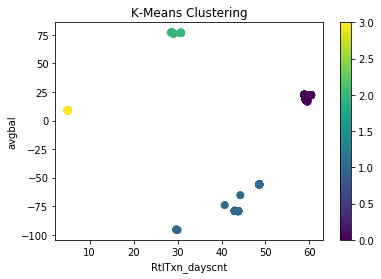

In [256]:
from matplotlib import pyplot as plt
fig = plt.figure()

ax = fig.add_subplot(111)
scatter = ax.scatter(final_df['latitude'],final_df['longitude'],
                     c=final_df['pred_loc_clusters'],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('RtlTxn_dayscnt')
ax.set_ylabel('avgbal')
plt.colorbar(scatter)

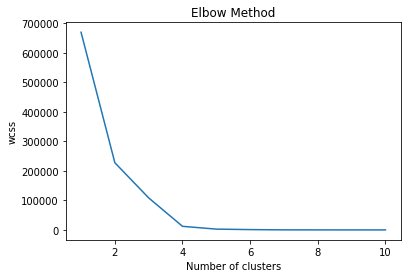

In [253]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(final_df[['latitude','longitude']])
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [267]:
final_df.pred_loc_clusters[final_df.pred_loc_clusters==0].count()

459

In [274]:
list1=[1,2,3,4,5]
list(filter(lambda x: x%2==0,list1))

[2, 4]

In [9]:
sc = pyspark.SparkContext.getOrCreate()